In [3]:
import torch

In [4]:
X_test = torch.load("../Datasets/FACED_dataset/emotion_test_set.pt")
X_train = torch.load("../Datasets/FACED_dataset/emotion_train_set.pt")

Class distribution in TRAIN set:
  Class 0: 29779
  Class 1: 29838
  Class 2: 29792

Class distribution in TEST set:
  Class 0: 7475
  Class 1: 7416
  Class 2: 7462


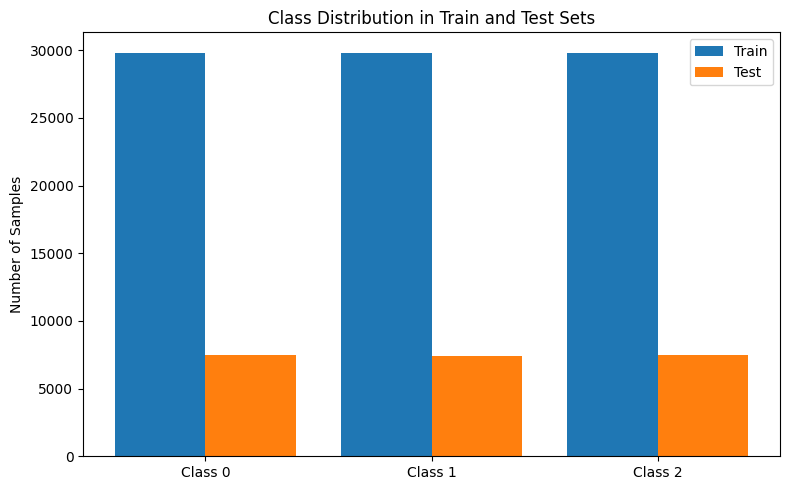

In [5]:
import torch
from collections import Counter
import matplotlib.pyplot as plt

def show_class_distribution(X_train, X_test, num_classes=3):
    def get_counts(dataset):
        labels = [sample[1] for sample in dataset]
        return Counter(labels)

    train_counts = get_counts(X_train)
    test_counts = get_counts(X_test)

    # Print distributions
    print("Class distribution in TRAIN set:")
    for cls in range(num_classes):
        print(f"  Class {cls}: {train_counts.get(cls, 0)}")

    print("\nClass distribution in TEST set:")
    for cls in range(num_classes):
        print(f"  Class {cls}: {test_counts.get(cls, 0)}")

    # Plotting
    labels = [f"Class {i}" for i in range(num_classes)]
    train_vals = [train_counts.get(i, 0) for i in range(num_classes)]
    test_vals = [test_counts.get(i, 0) for i in range(num_classes)]

    x = range(num_classes)
    plt.figure(figsize=(8, 5))
    plt.bar(x, train_vals, width=0.4, label='Train', align='center')
    plt.bar([i + 0.4 for i in x], test_vals, width=0.4, label='Test', align='center')
    plt.xticks([i + 0.2 for i in x], labels)
    plt.ylabel("Number of Samples")
    plt.title("Class Distribution in Train and Test Sets")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage:
show_class_distribution(X_train, X_test)


In [6]:
X_test_labels = [sublist[1] for sublist in X_test]
X_train_labels = [sublist[1] for sublist in X_train]

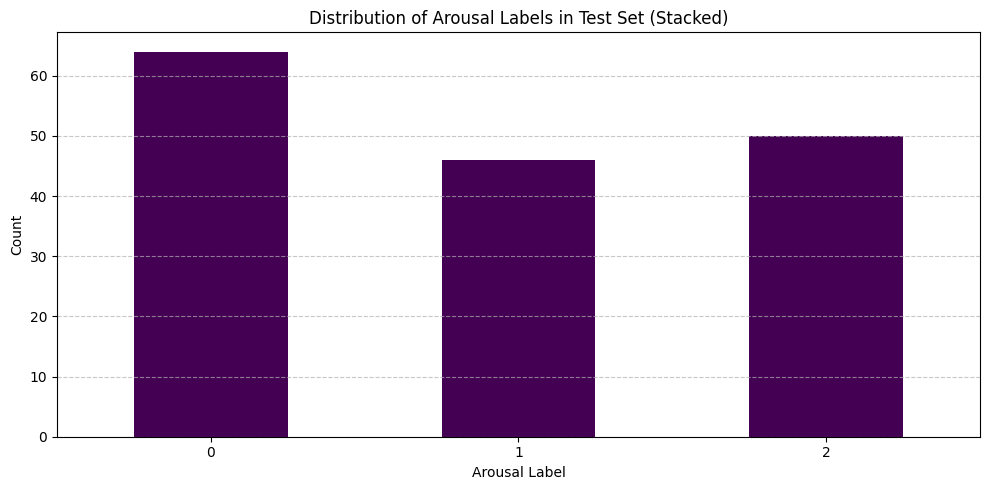

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
# Example: test = [0, 1, 1, 0, 2, 2, 2, 1, ...]
test = X_test_labels[:160]

# Convert to Series for easy counting
label_series = pd.Series(test)

# Count occurrences of each label
label_counts = label_series.value_counts().sort_index()

# Create a stacked bar chart
label_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))

# Labels and title
plt.xlabel("Arousal Label")
plt.ylabel("Count")
plt.title("Distribution of Arousal Labels in Test Set (Stacked)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()